In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [3]:
df.sample(8).style.background_gradient('copper_r')

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
116,0.933850,2.800000,8.100000,45.000000,40.000000
538,0.818360,3.700000,5.900000,58.000000,35.000000
466,0.603860,3.500000,9.400000,72.000000,33.000000
893,0.233510,3.500000,8.900000,43.000000,34.000000
946,0.429410,3.200000,8.900000,45.000000,35.000000
908,0.235310,2.700000,7.800000,46.000000,34.000000
1117,0.801280,2.700000,5.500000,51.000000,34.000000
1058,0.418270,3.000000,5.500000,50.000000,34.000000


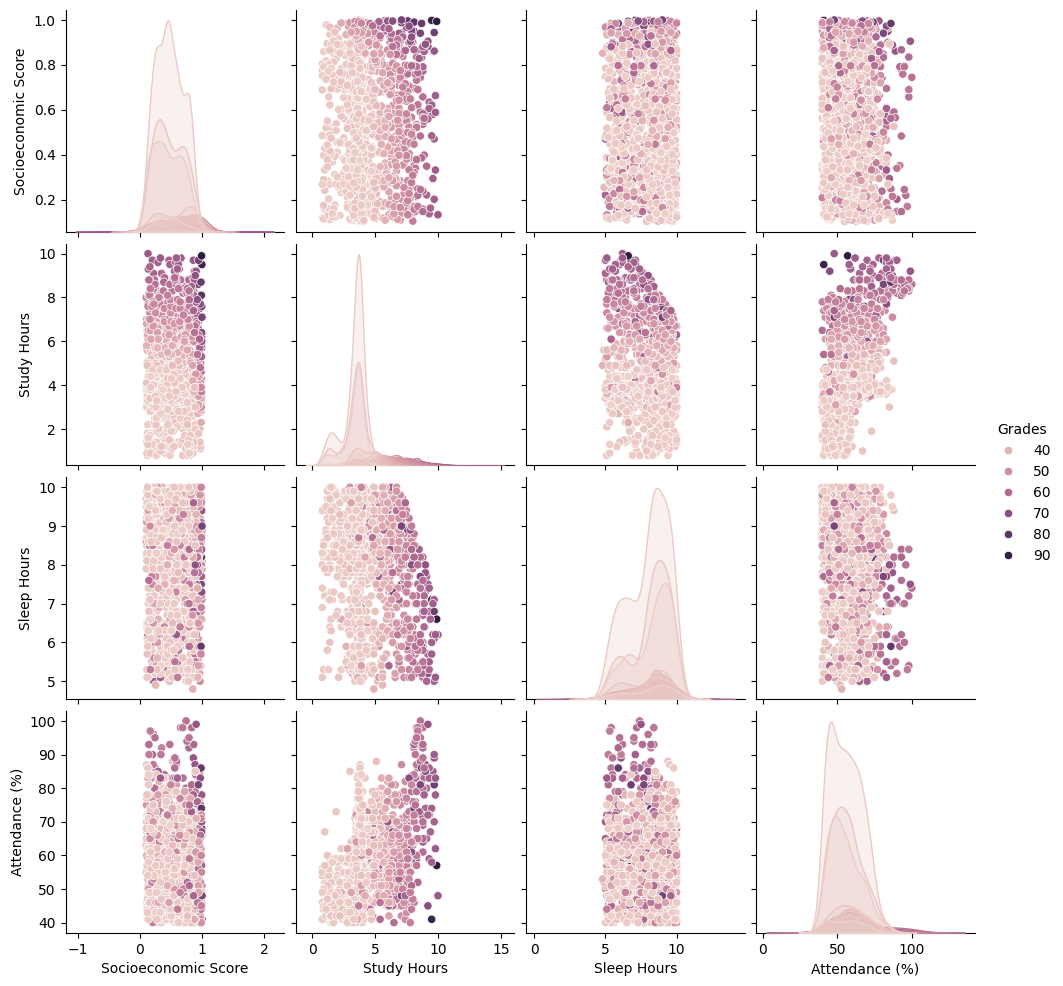

In [4]:
sns.pairplot(df,hue='Grades')

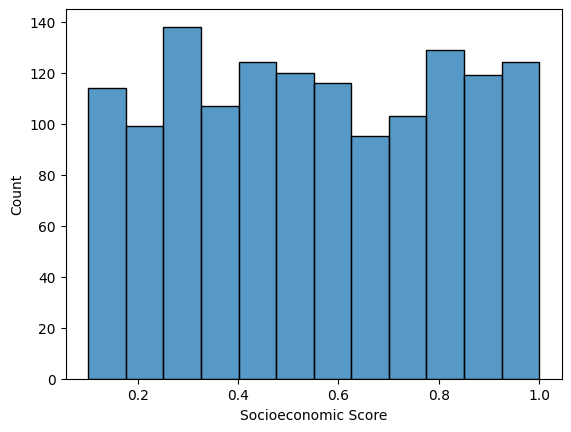

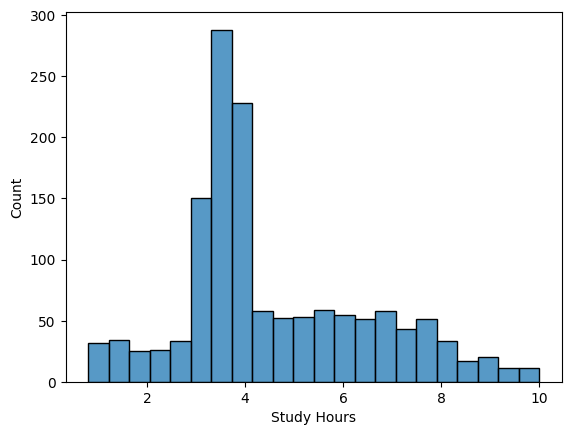

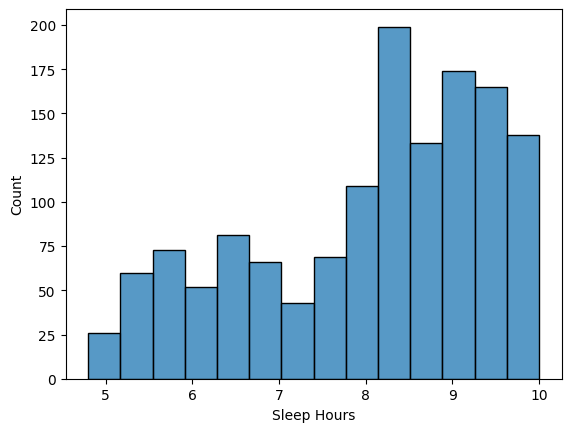

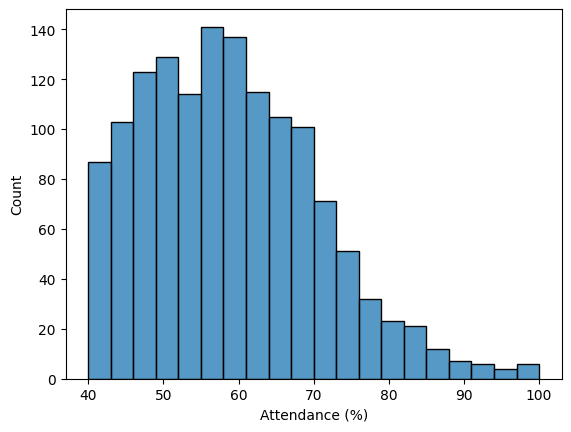

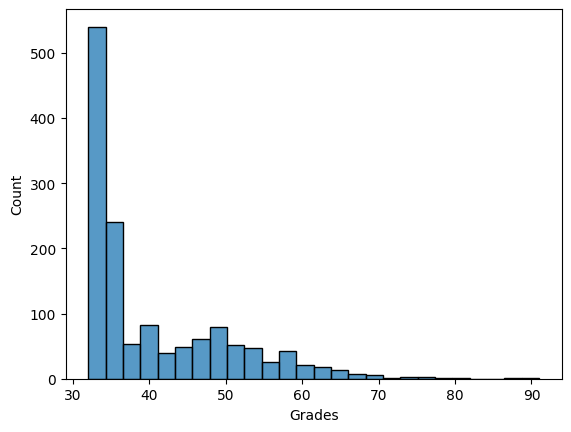

In [5]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

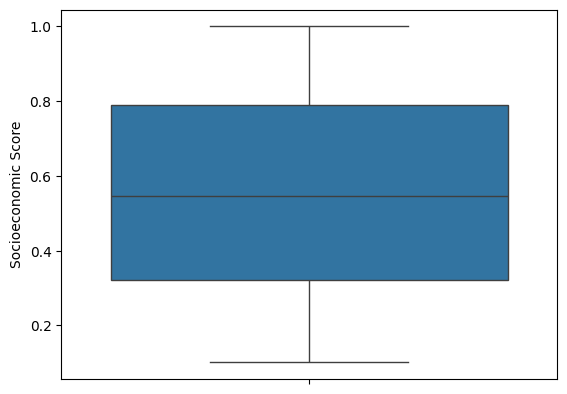

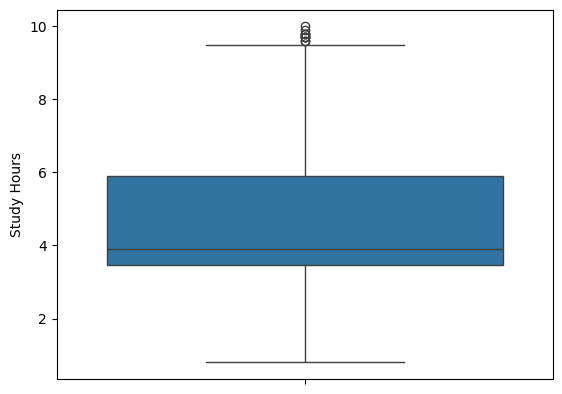

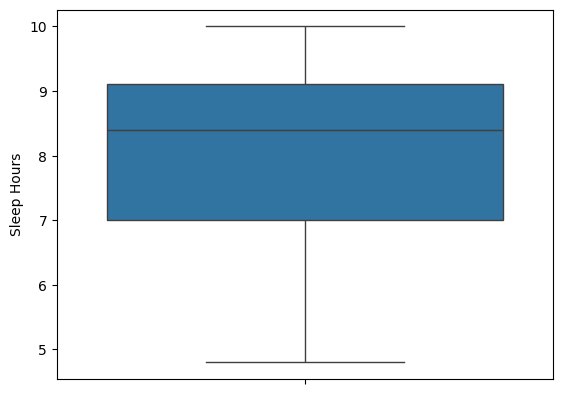

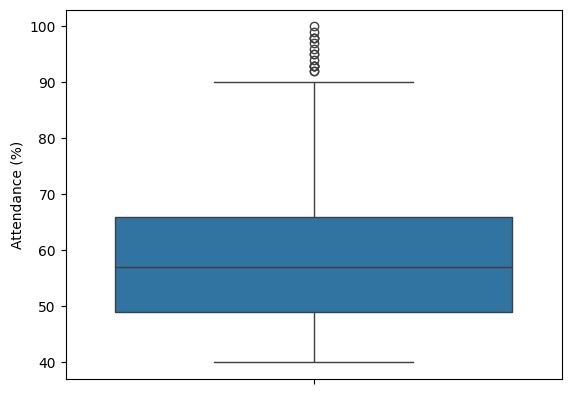

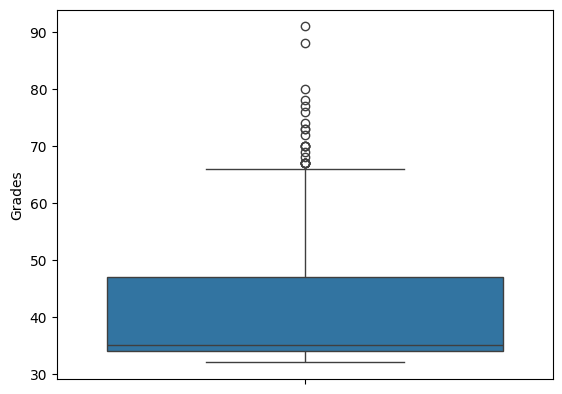

In [6]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [7]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [8]:
df = remove_outliers_iqr(df,'Grades')

In [9]:
df = remove_outliers_iqr(df,'Attendance (%)')

In [10]:
df = remove_outliers_iqr(df,'Study Hours')

In [11]:
df = remove_outliers_iqr(df,'Grades')

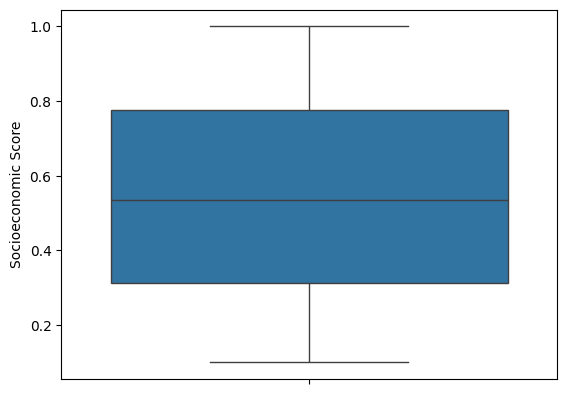

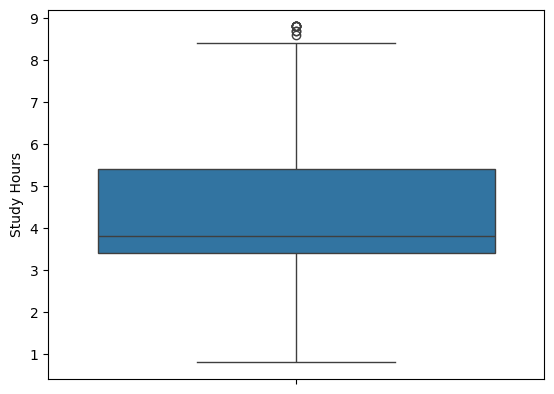

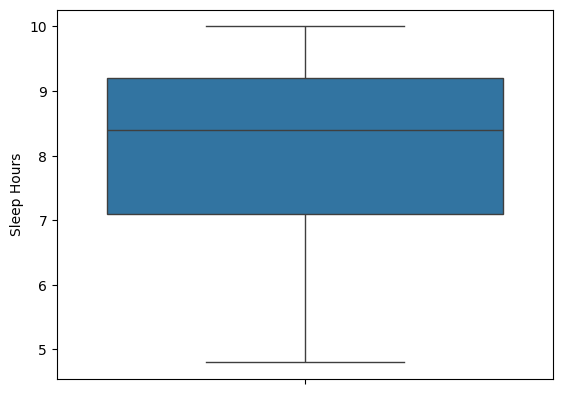

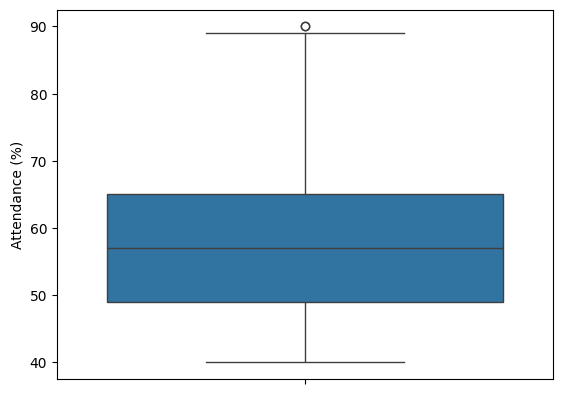

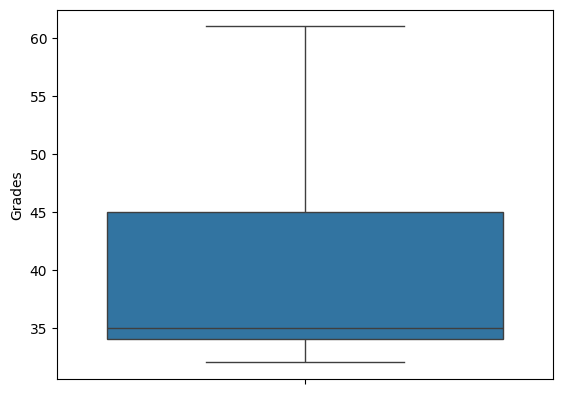

In [12]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [13]:
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


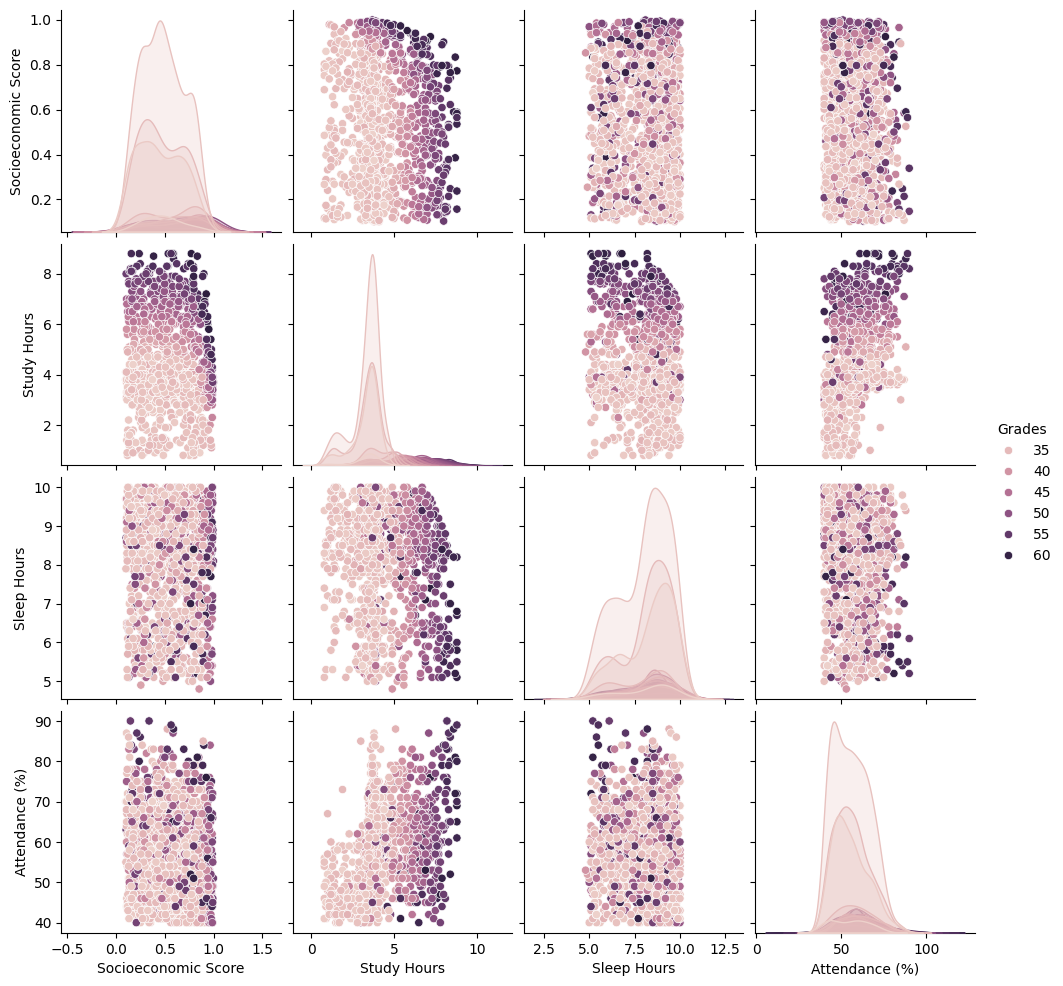

In [14]:
sns.pairplot(df,hue='Grades')

In [15]:
df.corr().style.background_gradient('copper')

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
Socioeconomic Score,1.000000,-0.061919,0.012124,-0.056533,0.297258
Study Hours,-0.061919,1.000000,-0.120522,0.404410,0.772345
Sleep Hours,0.012124,-0.120522,1.000000,-0.056844,-0.058018
Attendance (%),-0.056533,0.404410,-0.056844,1.000000,0.202336
Grades,0.297258,0.772345,-0.058018,0.202336,1.000000


<Axes: xlabel='Grades', ylabel='Study Hours'>

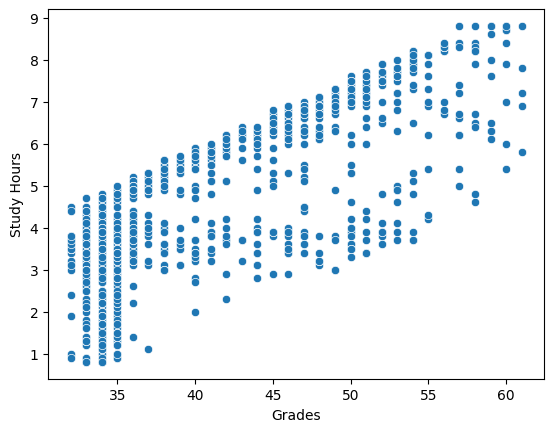

In [16]:

sns.scatterplot(df,x='Grades',y='Study Hours')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Study Hours']],df['Grades'],test_size=0.2,random_state=48)

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [19]:
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()

In [20]:
dtr.fit(X_train,y_train)
rf.fit(X_train,y_train)
svm.fit(X_train,y_train)
"done"

'done'

In [21]:
print(f"""DTR Score: {dtr.score(X_test,y_test)}
RF Score: {rf.score(X_test,y_test)}
SVM Score: {svm.score(X_test,y_test)}""")

DTR Score: 0.7422449232235354
RF Score: 0.7444975981264533
SVM Score: 0.7363371834436616
